<a href="https://colab.research.google.com/github/swapnil-garge/ML-Projects/blob/main/Uber_data__Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Uber_Data.csv')
X = dataset.iloc[:, :-1].values
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:, -1].values

## Plotting Data

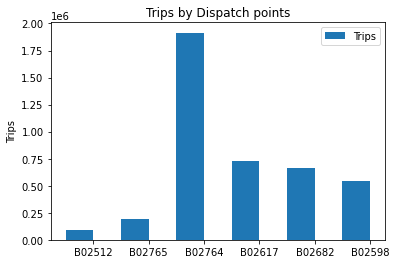

In [3]:
B02512_data = sum(dataset[dataset.dispatching_base_number == 'B02512'].iloc[:,-1].values)
B02765_data = sum(dataset[dataset.dispatching_base_number == 'B02765'].iloc[:,-1].values)
B02764_data = sum(dataset[dataset.dispatching_base_number == 'B02764'].iloc[:,-1].values)
B02617_data = sum(dataset[dataset.dispatching_base_number == 'B02617'].iloc[:,-1].values)
B02682_data = sum(dataset[dataset.dispatching_base_number == 'B02682'].iloc[:,-1].values)
B02598_data = sum(dataset[dataset.dispatching_base_number == 'B02598'].iloc[:,-1].values)

# Stack Data
bar_data = pd.DataFrame({
    'base':['B02512', 'B02765', 'B02764','B02617','B02682','B02598' ],
    'basedata':[B02512_data, B02765_data, B02764_data,B02617_data,B02682_data,B02598_data ]
})

x1 = np.arange(len(bar_data.base)) 
width = 0.5 
fig, ax = plt.subplots()
rects1 = ax.bar(x1 - width/2, bar_data.basedata, width, label='Trips')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trips')
ax.set_title('Trips by Dispatch points')
ax.set_xticks(x1)
ax.set_xticklabels(bar_data.base)
ax.legend()



**# Key Insight: B02764 dispatch unit is the busiet dispatch unit. If there was resouce constraints at B02764, the dispatch units that we would likely get help from are B02512 and B02765**

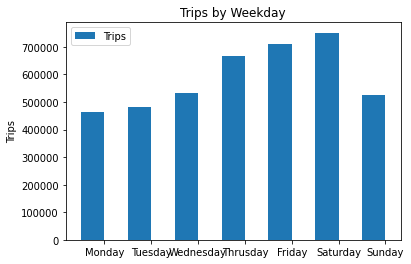

In [4]:
Monday_data = sum(dataset[dataset.Day == 'Monday'].iloc[:,-1].values)
Tuesday_data = sum(dataset[dataset.Day == 'Tuesday'].iloc[:,-1].values)
Wednesday_data = sum(dataset[dataset.Day == 'Wednesday'].iloc[:,-1].values)
Thursday_data = sum(dataset[dataset.Day == 'Thursday'].iloc[:,-1].values)
Friday_data = sum(dataset[dataset.Day == 'Friday'].iloc[:,-1].values)
Saturday_data = sum(dataset[dataset.Day == 'Saturday'].iloc[:,-1].values)
Sunday_data = sum(dataset[dataset.Day == 'Sunday'].iloc[:,-1].values)

# Stack Data
bar_data1 = pd.DataFrame({
    'base':['Monday', 'Tuesday', 'Wednesday','Thrusday','Friday','Saturday','Sunday' ],
    'basedata':[Monday_data, Tuesday_data, Wednesday_data,Thursday_data,Friday_data,Saturday_data,Sunday_data ]
})


x1 = np.arange(len(bar_data1.base)) 
width = 0.5 
fig, ax = plt.subplots()
rects1 = ax.bar(x1 - width/2, bar_data1.basedata, width, label='Trips')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trips')
ax.set_title('Trips by Weekday')
ax.set_xticks(x1)
ax.set_xticklabels(bar_data1.base)
ax.legend()


**# Key Insight:The data is showing weekend (Thur-Sat) is the busiest time, which makes sense as typically people have more time to move out and about during weekend.** 

## Encoding categorical data

### Encoding the Independent Variable

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_test.shape)

## Feature Scaling

In [9]:
# Needed only for support vector regression? 
X_train_SV = X_train.copy()
y_train_SV = y_train.copy()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_SV[:,13:] = sc.fit_transform(X_train[:,13:])


In [10]:
sc_y = StandardScaler()
y_train_SV = sc_y.fit_transform(y_train.reshape(-1,1))
#y_test = sc.transform(y_test.reshape(-1,1))


## Training Regression models on the Training set

In [19]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

# Support Vector Regression
from sklearn.svm import SVR
reg2 = SVR(kernel = 'linear')
reg2.fit(X_train, y_train)

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
reg3 = RandomForestRegressor(n_estimators = 10, random_state = 1)
reg3.fit(X_train, y_train)

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
reg4 = LinearRegression()
reg4.fit(X_poly, y_train)

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
reg5 = DecisionTreeRegressor(random_state = 0)
reg5.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting the Test set results

In [20]:
#y_pred = regressor.predict(X_test)

y_pred1 = reg1.predict(X_test)
#y_pred2 = sc_y.inverse_transform(reg2.predict(sc.transform(X_test)))
y_pred2 = reg2.predict(X_test)
y_pred3 = reg3.predict(X_test)
y_pred4 = reg4.predict(poly_reg.transform(X_test))
y_pred5 = reg5.predict(X_test)

#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#print(len(X_test))

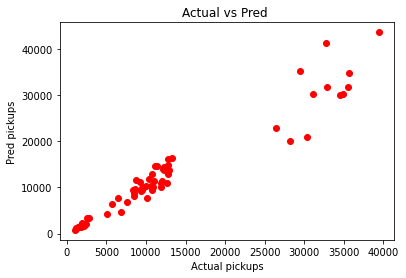

In [21]:
plt.scatter(y_pred2, y_test, color = 'red')
plt.title('Actual vs Pred ')
plt.xlabel('Actual pickups')
plt.ylabel('Pred pickups')
plt.show()

## Evaluating the Model Performance

Regression r2
Linear Regression 0.9510150623128375
Support Vector 0.9367097311922842
Random Forest 0.9373508706864239
Polynomial 0.9505862776751559
Decision Tree 0.9369685233611375


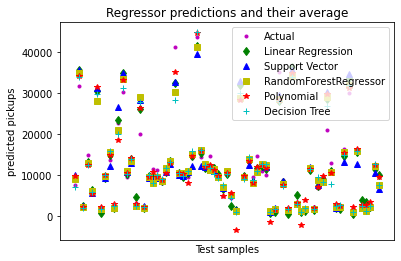

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)
print('Regression', 'r2')
print('Linear Regression',r2_score(y_test, y_pred1))
print('Support Vector',r2_score(y_test, y_pred2))
print('Random Forest',r2_score(y_test, y_pred3))
print('Polynomial',r2_score(y_test, y_pred4))
print('Decision Tree',r2_score(y_test, y_pred5))
  #    np.contactenate('Support Vector',r2_score(y_test,ypred2)), \n,

plt.figure()
plt.plot(y_test, 'm.', label='Actual')
plt.plot(y_pred1, 'gd', label='Linear Regression')
plt.plot(y_pred2, 'b^', label='Support Vector')
plt.plot(y_pred3, 'ys', label='RandomForestRegressor')
plt.plot(y_pred4, 'r*', label='Polynomial')
plt.plot(y_pred5, 'c+', label='Decision Tree')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted pickups')
plt.xlabel('Test samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

** # Key Insight: Linear Regression works reasonably well for this dataset for predicting pickups as a function of weekday, dispatch location, and active taxis**